Directorio de trabajo actual: d:\info usuario\escritorio\Daniel\physics\Laboratories\Third_practice
   θ(◦)   X̄max(cm)
0     0  103.333333
1    15  167.833333
2    30  232.600000
3    45  245.200000
4    60  204.766667
5    75  112.633333
Index(['θ(◦)', 'X̄max(cm)'], dtype='object')


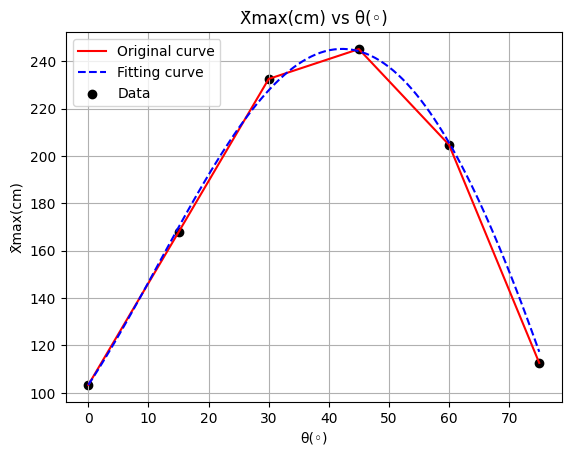

Coeficiente de Pearson: 0.15067292778182775
Valores constantes: I3 = 466.90965895945, L3 = 980, L2 = 24
Función de ajuste: Complex Function: (((466.90965895945^2) * sin(2*θ)) / (2*980)) + ((466.90965895945 * cos(θ) / 980) * sqrt((466.90965895945 * sin(θ))^2 + (2*980*24)))


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os

# Imprime el directorio de trabajo actual
print("Directorio de trabajo actual:", os.getcwd())

# Leer datos de un archivo Excel
datos = pd.read_excel('Third_practice_Excel.xlsx', header=1, usecols=['θ(◦)', 'X̄max(cm)'], nrows=6)

print(datos)
print(datos.columns)

# Independient variable
z1 = datos["θ(◦)"]

# Dependient variable
z2 = datos["X̄max(cm)"]

# Definir la función compleja con I3, L3, y L2 como constantes
I3 = 466.90965895945  # Valor constante de I3
L3 = 980  # Valor constante de L3
L2 = 24  # Valor constante de L2

def complex_function(degrees):
    return (((I3**2) * np.sin(np.radians(2*degrees))) / (2*L3)) + (((I3 * np.cos(np.radians(degrees))) / L3) * np.sqrt(((I3 * np.sin(np.radians(degrees)))**2) + (2*L3*L2)))

# Generar datos ajustados
z1_smooth = np.linspace(min(z1), max(z1), 100)
z2_smooth = complex_function(z1_smooth)

plt.plot(z1, z2, 'r-', label='Original curve')
plt.plot(z1_smooth, z2_smooth, 'b--', label='Fitting curve')

plt.xlabel('θ(◦)')
plt.ylabel('X̄max(cm)')

plt.scatter(z1, z2, label='Data', color='black')
plt.legend()

# Calcular el coeficiente de correlación de Pearson
coeficiente_pearson, p_valor = pearsonr(z1, z2)

# Calculate the position for the label to be above the center
x_label = (min(z1) + max(z1)) / 2
y_label = (min(z2) + max(z2)) / 1.7

# Adjustment function of the fitting curve
adjustment_function = f"Complex Function: ((({I3}^2) * sin(2*θ)) / (2*{L3})) + (({I3} * cos(θ) / {L3}) * sqrt(({I3} * sin(θ))^2 + (2*{L3}*{L2})))"

# Title
plt.title('X̄max(cm) vs θ(◦)')

# Pearson Coeficient
# plt.text(x_label, (y_label*1.7/2.4), f"Pearson Coeficient: {round(coeficiente_pearson, 4)}", ha='center', va='center', color='blue')

# Place a label above the center
# plt.text(x_label+4, y_label, adjustment_function, ha='center', va='bottom', color='blue')

# Cuadricule
plt.grid(True)

plt.show()

print(f"Coeficiente de Pearson: {coeficiente_pearson}")
# print(f"P-valor: {p_valor}")
print(f"Valores constantes: I3 = {I3}, L3 = {L3}, L2 = {L2}")
print(f"Función de ajuste: {adjustment_function}")